<a href="https://colab.research.google.com/github/LeticiaVieirg/crack_thermal_detection/blob/main/train_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU

Let's make sure that we have access to GPU


In [ ]:
!nvidia-smi

Mon Feb  2 21:23:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.1 MB/s eta 0:00:00


# Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   38.7/112.6 GB
CPU                    Intel Xeon CPU @ 2.00GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-python          ✅ 4.13.0.90>=4.6.0
pillow                 ✅ 11.3.0>=7.1.2
pyyaml                 ✅ 6.0.3>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.16.3>=1.4.1
torch                  ✅ 2.9.0+cu126>=1.8.0
torch                  ✅ 2.9.0+cu126!=2.4.0,>=1.8.0; sys_platform == "win32"
t

#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder='/content/drive/MyDrive/CAI_SWTB/train'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api_key")
project = rf.workspace("name").project("project")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 139.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wind-turbine-blade-5 in yolov8:: 100%|██████████| 212/212 [00:00<00:00, 7098.21it/s]


# Train the model

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/Wind-turbine-blade-5/data.yaml epochs=100 imgsz=224

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Wind-turbine-blade-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

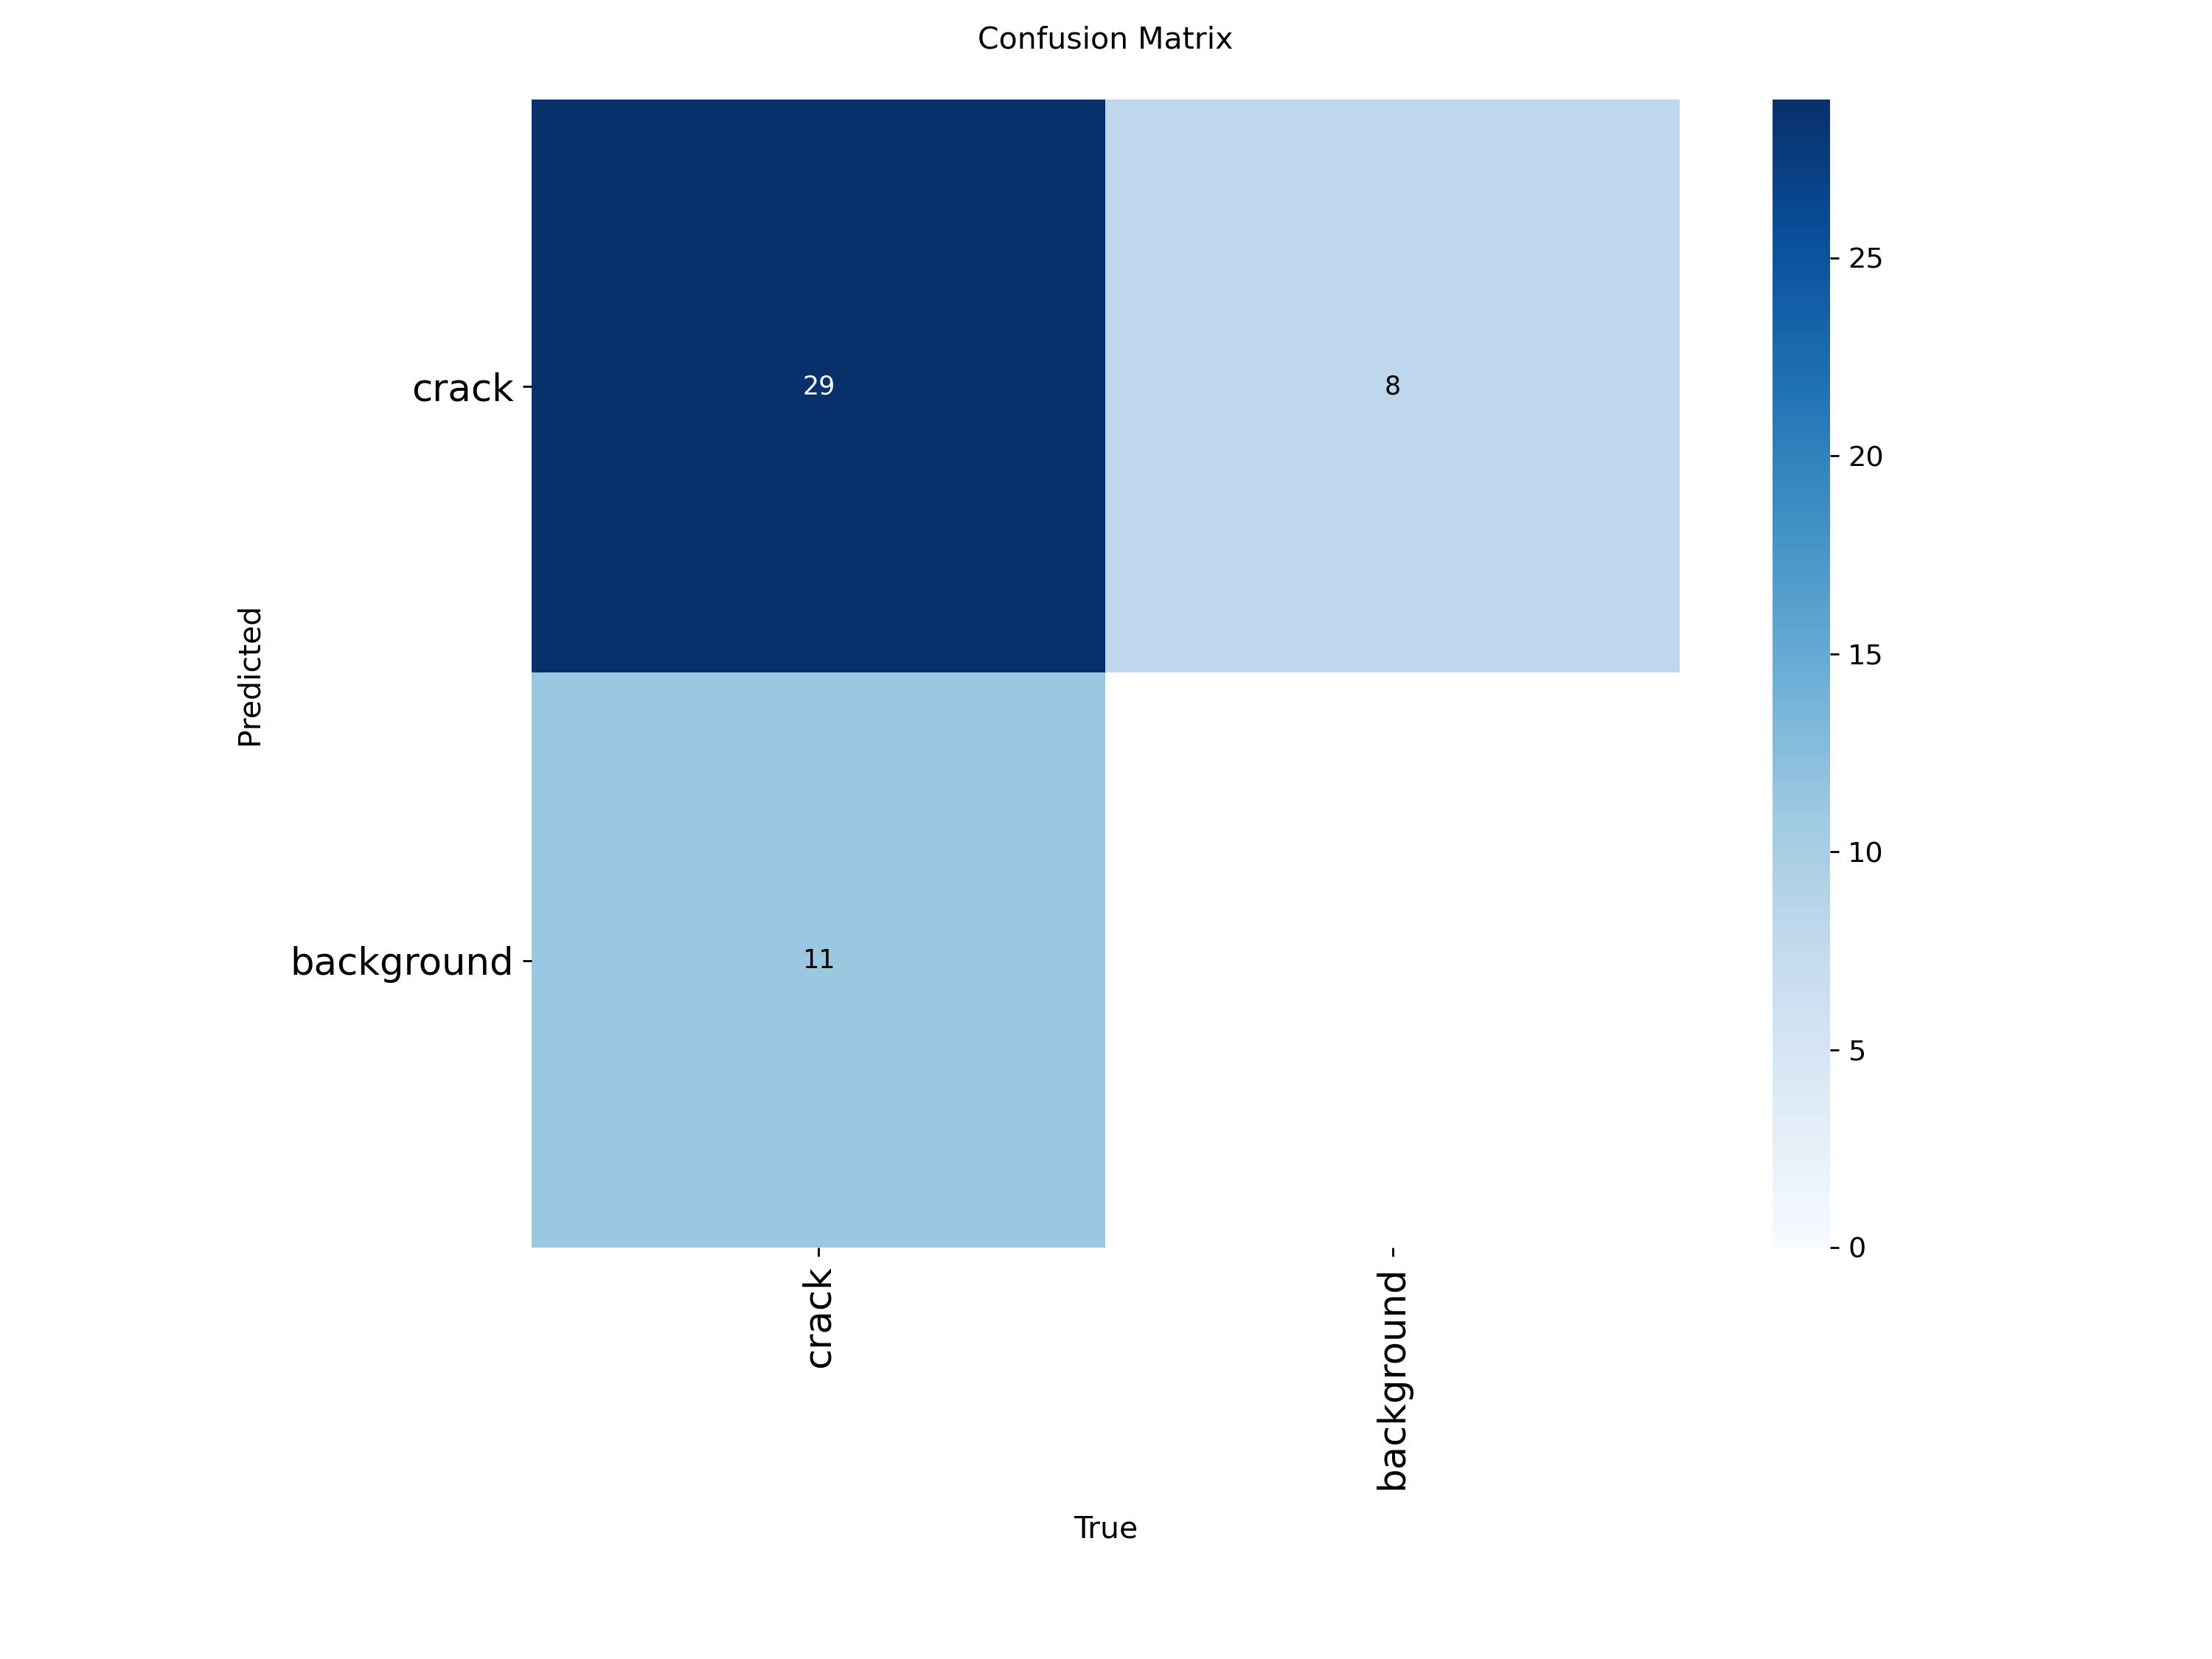

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

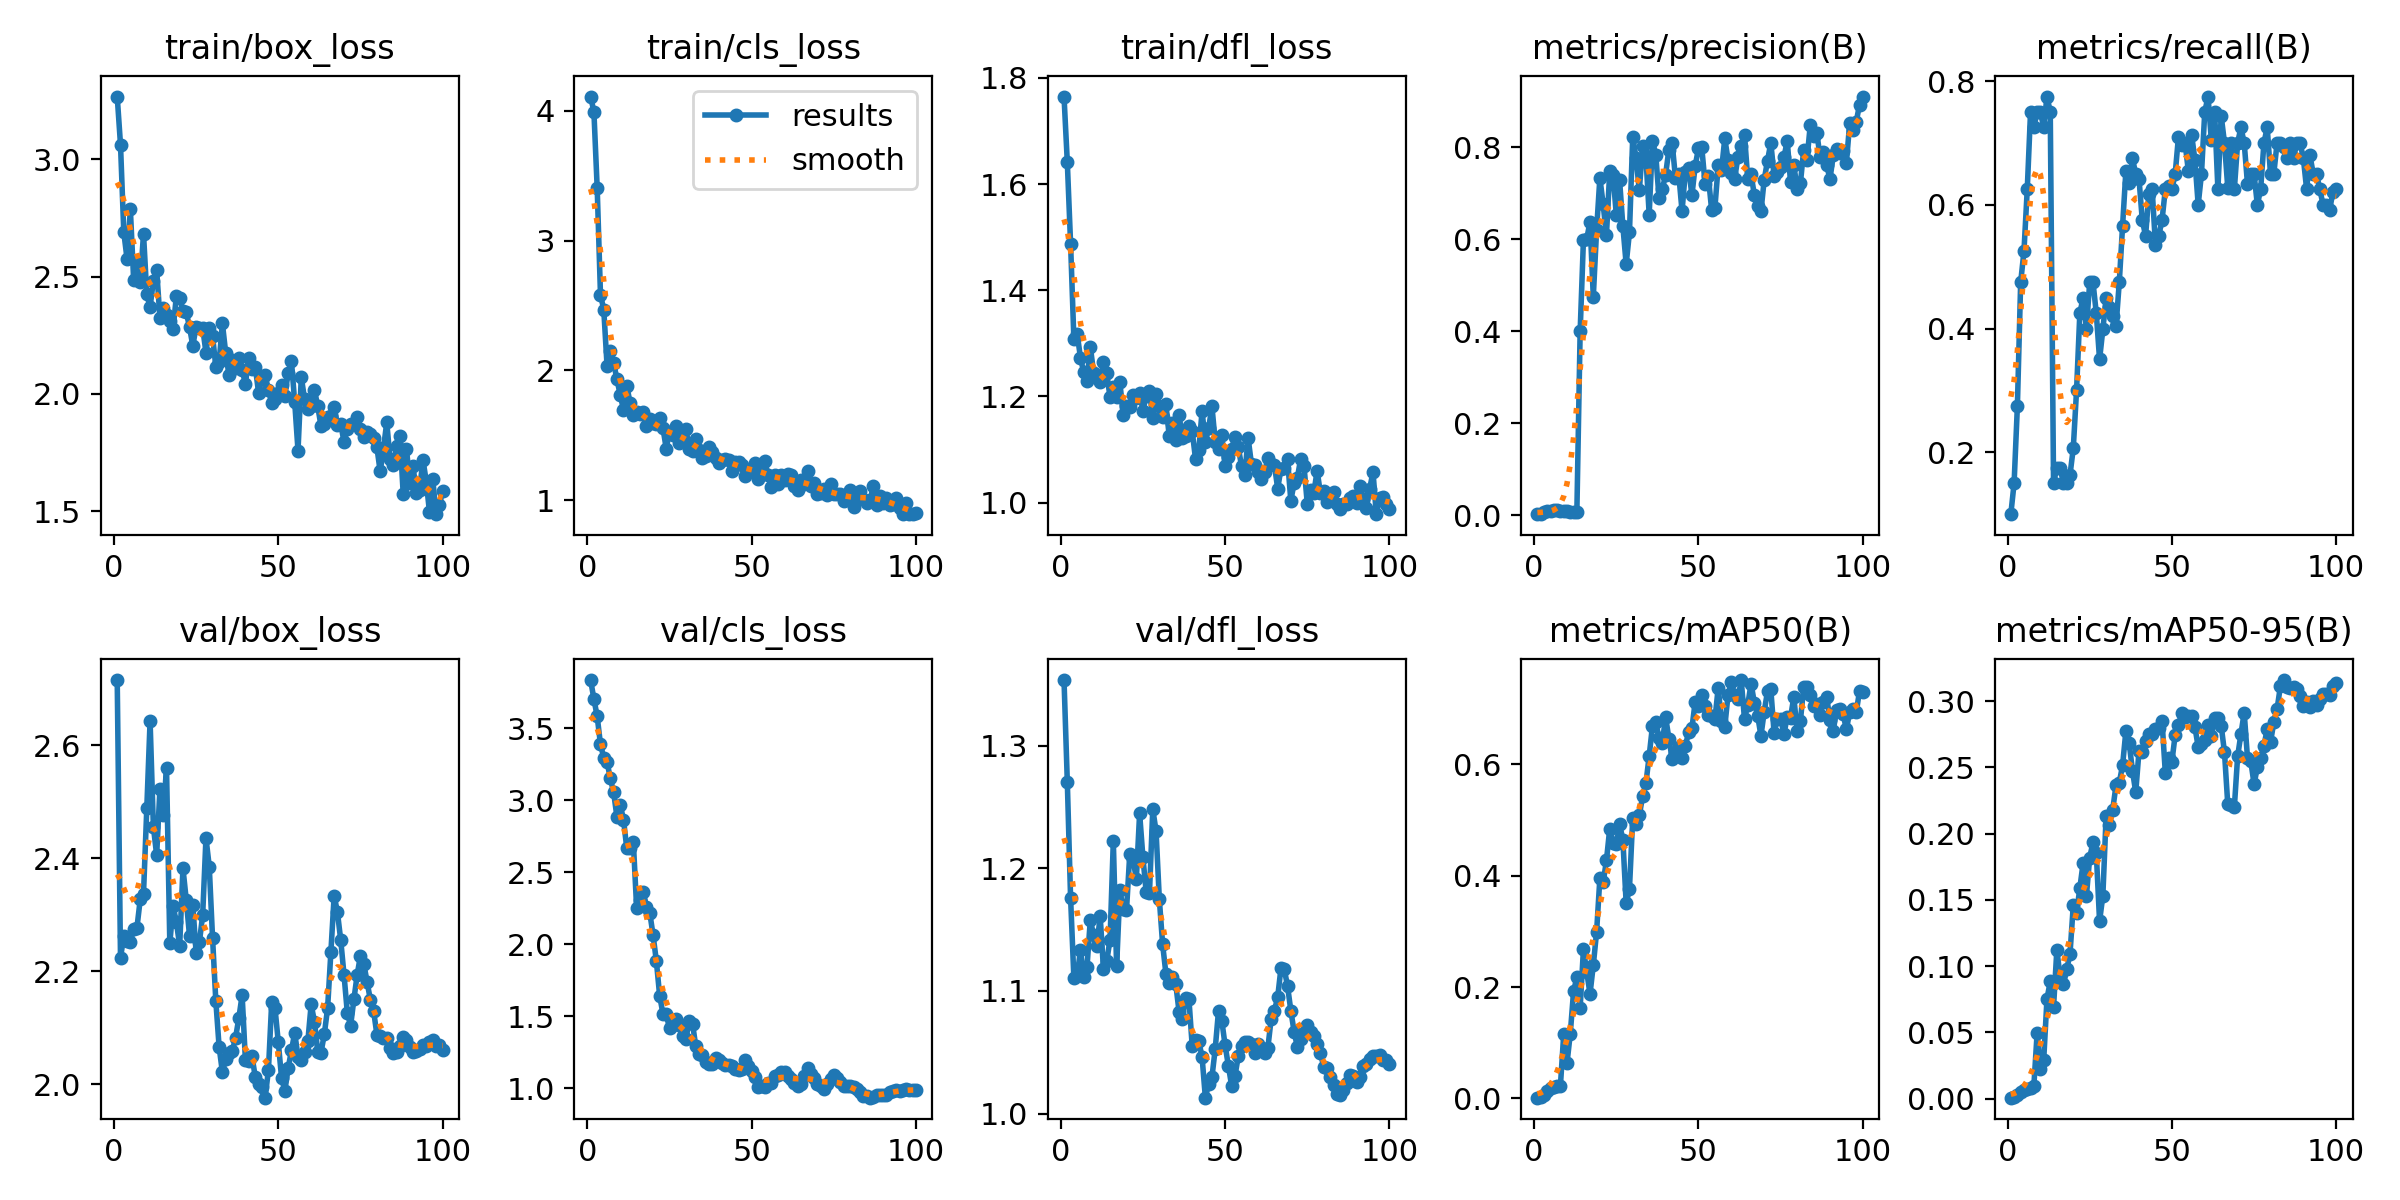

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

# Validate the model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Wind-turbine-blade-5/data.yaml

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 814.4±272.8 MB/s, size: 15.6 KB)
val: Scanning /content/Wind-turbine-blade-5/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 15/15 3.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.5it/s 0.2s
                   all         15         40      0.848      0.695      0.724       0.32
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.
Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 224x192 (no detections), 55.1ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 128x224 (no detections), 37.1ms
Speed: 0.8ms preprocess, 46.1ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 224)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


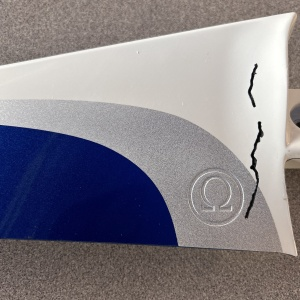

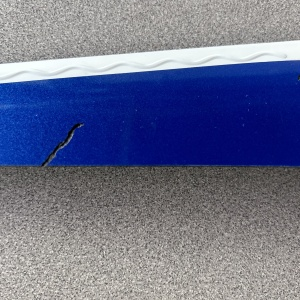

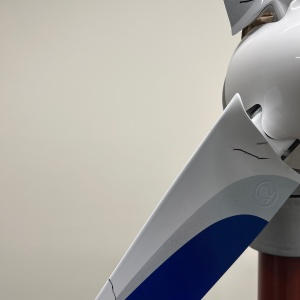

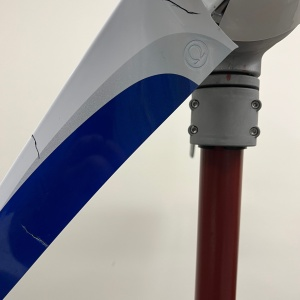

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob("/content/runs/detect/predict/*.jpg"):
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!pip install inference-sdk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.13.0.90
    Uninstalling opencv-python-4.13.0.90:
      Successfully uninstalled opencv-python-4.13.0.90
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.13.3
    Uninstalling aiohttp-3.13.3:
      Successfully uninstalled aiohttp-3.13.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from inference_sdk import InferenceHTTPClient

client = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="api_key"
)


In [ ]:
import os
from PIL import Image

def save_yolo_labels(result, image_path, label_path):
    img = Image.open(image_path)
    w, h = img.size

    with open(label_path, "w") as f:
        for pred in result["predictions"]:
            if pred["class"] == "crack":
                x = pred["x"] / w
                y = pred["y"] / h
                bw = pred["width"] / w
                bh = pred["height"] / h

                f.write(f"0 {x} {y} {bw} {bh}\n")


In [ ]:
import glob

images_dir = "/content/drive/MyDrive/TCC/Train/Faulty"
labels_dir = "/content/drive/MyDrive/TCC/Train/Labels"
os.makedirs(labels_dir, exist_ok=True)

for img_path in glob.glob(images_dir + "/*.jpg"):
    result = client.infer(
      img_path,
      model_id="model/5"
)

    label_file = os.path.join(
        labels_dir,
        os.path.basename(img_path).replace(".jpg", ".txt")
    )

    save_yolo_labels(result, img_path, label_file)


In [ ]:
from inference_sdk import InferenceHTTPClient

client = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="api_key"
)

result = client.infer(
    img_path,
    model_id="model/5"
)

print(result)


{'inference_id': 'c11f7840-58c9-4573-9000-05c6ed84a6bd', 'time': 0.18151290200012227, 'image': {'width': 300, 'height': 300}, 'predictions': []}


In [ ]:
from pprint import pprint
pprint(result)


{'image': {'height': 300, 'width': 300},
 'inference_id': 'c11f7840-58c9-4573-9000-05c6ed84a6bd',
 'predictions': [],
 'time': 0.18151290200012227}
